In [1]:
# Python Notebook - Predicting Housing Prices in Queens, NY

#Import standard Python libraries for numerical analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Set plot styles
sns.set(style="darkgrid")

In [2]:
housing = pd.read_csv("capstone-data/predicting_housing_prices_in_queens_ny-queens_prices.csv")
housing.head()

,borough_code,neighborhood,zipcode,land_square_feet,gross_square_feet,sale_price,community_district,school_district,floor_area_total_building,floor_area_residential,maximum_allowable_residential_far,x_coordinate,y_coordinate
0,4,CORONA,11368,2666.0,1514.0,1100000.0,404,24,1514,1178.0,3.0,1022065.0,208029.0
1,4,CORONA,11368,2517.0,1715.0,650000.0,403,24,1715,1715.0,1.1,1020472.0,213876.0
2,4,CORONA,11368,2500.0,1380.0,664000.0,403,24,1380,1080.0,1.1,1020537.0,213788.0
3,4,CORONA,11368,2500.0,1098.0,650000.0,403,30,1098,1098.0,1.1,1021160.0,214421.0
4,4,CORONA,11368,2500.0,2081.0,795000.0,403,30,2081,2081.0,1.1,1020230.0,213575.0


In [3]:
housing.describe()

,borough_code,zipcode,land_square_feet,gross_square_feet,sale_price,community_district,school_district,floor_area_total_building,floor_area_residential,maximum_allowable_residential_far,x_coordinate,y_coordinate
count,5219.0,5219.000000,5215.000000,5213.000000,5.219000e+03,5219.000000,5219.000000,5219.000000,5215.000000,5203.000000,5.213000e+03,5213.000000
mean,4.0,11394.376892,3322.016299,1469.938999,6.628835e+05,409.885419,27.021843,1464.751677,1397.595206,0.678503,1.040679e+06,199684.296950
std,0.0,87.548801,1601.536740,522.913821,3.169227e+05,6.089682,1.733240,564.510125,491.589135,0.318057,1.381367e+04,14964.532823
min,4.0,11001.000000,200.000000,240.000000,2.014000e+05,101.000000,2.000000,240.000000,240.000000,0.500000,9.498450e+05,146625.000000
25%,4.0,11365.000000,2100.000000,1153.000000,4.500000e+05,407.000000,26.000000,1152.000000,1131.500000,0.500000,1.031477e+06,189032.000000
50%,4.0,11412.000000,3000.000000,1344.000000,5.990000e+05,411.000000,27.000000,1340.000000,1296.000000,0.600000,1.041789e+06,199656.000000
75%,4.0,11426.000000,4000.000000,1666.000000,8.250000e+05,412.000000,29.000000,1650.000000,1552.000000,0.900000,1.051868e+06,210872.000000
max,4.0,11697.000000,25425.000000,8300.000000,5.500000e+06,502.000000,31.000000,15928.000000,12720.000000,10.000000,1.067063e+06,230948.000000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 13 columns):
borough_code                         5219 non-null int64
neighborhood                         5219 non-null object
zipcode                              5219 non-null int64
land_square_feet                     5215 non-null float64
gross_square_feet                    5213 non-null float64
sale_price                           5219 non-null float64
community_district                   5219 non-null int64
school_district                      5219 non-null int64
floor_area_total_building            5219 non-null int64
floor_area_residential               5215 non-null float64
maximum_allowable_residential_far    5203 non-null float64
x_coordinate                         5213 non-null float64
y_coordinate                         5213 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 530.1+ KB


In [5]:
housing.drop(["borough_code", "maximum_allowable_residential_far", "floor_area_total_building", "floor_area_residential"], axis=1, inplace=True)

In [6]:
air_quality = { 11101 : 5.3, 11102 : 5.3, 11103 : 5.3, 11104 : 5.3, 11105 : 5.3, 11106 : 5.3, 11109 : 5.3, 11368 : 4.4, 11369 : 4.4, 11370 : 4.4, 11372 : 4.4, 11373 : 4.4, 11377 : 4.4, 11378 : 4.4, 11354 : 3.1, 11355 : 3.1, 11356 : 3.1, 11357 : 3.1, 11358 : 3.1, 11359 : 3.1, 11360 : 3.1, 11361 : 2.8, 11362 : 2.8, 11363 : 2.8, 11364 : 2.8, 11365 : 2.9, 11366 : 2.9, 11367 : 2.9, 11414 : 3.3, 11415 : 3.3, 11416 : 3.3, 11417 : 3.3, 11418 : 3.3, 11419 : 3.3, 11420 : 3.3, 11421 : 3.3, 11374 : 3.7, 11375 : 3.7, 11379 : 3.7, 11385 : 3.7, 11412 : 3, 11423 : 3, 11430 : 3, 11432 : 3, 11433 : 3, 11434 : 3, 11435 : 3, 11436 : 3, 11001 : 2.6, 11004 : 2.6, 11005 : 2.6, 11040 : 2.6, 11411 : 2.6, 11413 : 2.6, 11422 : 2.6, 11426 : 2.6, 11427 : 2.6, 11428 : 2.6, 11429 : 2.6, 11691 : 2.6, 11692 : 2.6, 11693 : 2.6, 11694 : 2.6, 11697 : 2.6 }
qns_eic = { 11004 : 0.484444444444444, 11005 : 0.258741258741259, 11101 : 0.541666666666667, 11102 : 0.611650485436893, 11103 : 0.604770813844715, 11104 : 0.599348534201954, 11105 : 0.573373676248109, 11106 : 0.596781403665624, 11354 : 0.777186564682408, 11355 : 0.851420678768745, 11356 : 0.709443099273608, 11357 : 0.491902834008097, 11358 : 0.623804463336876, 11360 : 0.427, 11361 : 0.548293391430646, 11362 : 0.467889908256881, 11363 : 0.446745562130178, 11364 : 0.53078677309008, 11365 : 0.618277010947168, 11366 : 0.55783308931186, 11367 : 0.630539241857982, 11368 : 0.838716271463614, 11369 : 0.762092238470191, 11370 : 0.693233082706767, 11372 : 0.703829787234043, 11373 : 0.790552410696857, 11374 : 0.564057717533887, 11375 : 0.426894045289349, 11377 : 0.716816094467527, 11378 : 0.616086708499715, 11379 : 0.517806670435274, 11385 : 0.678884137650173, 11411 : 0.609620721554117, 11412 : 0.680104712041885, 11413 : 0.639963167587477, 11414 : 0.496978851963746, 11415 : 0.528616024973985, 11416 : 0.774856203779786, 11417 : 0.689069925322471, 11418 : 0.722693831352575, 11419 : 0.782758620689655, 11420 : 0.716092455298735, 11421 : 0.722332015810277, 11422 : 0.635757575757576, 11423 : 0.687294272547729, 11426 : 0.551130247578041, 11427 : 0.591452991452992, 11428 : 0.652917505030181, 11429 : 0.692191053828658, 11430 : 0.5625, 11432 : 0.723125884016973, 11433 : 0.767813267813268, 11434 : 0.687152563310686, 11435 : 0.709000762776507, 11436 : 0.716981132075472, 11501 : 0.455463728191001, 11507 : 0.394179894179894, 11509 : 0.37593984962406, 11510 : 0.482700892857143, 11514 : 0.463035019455253, 11516 : 0.442136498516321, 11518 : 0.432142857142857, 11520 : 0.651919866444073, 11530 : 0.337698139214335, 11542 : 0.57089552238806, 11545 : 0.389438943894389, 11548 : 0.462686567164179, 11550 : 0.746967071057192, 11552 : 0.510852713178295, 11553 : 0.720274914089347, 11554 : 0.462316641375822, 11557 : 0.402439024390244, 11558 : 0.523584905660377, 11559 : 0.458549222797928, 11560 : 0.443148688046647, 11561 : 0.428205128205128, 11563 : 0.441840277777778, 11565 : 0.378378378378378, 11566 : 0.387622149837134, 11568 : 0.362573099415205, 11570 : 0.402777777777778, 11572 : 0.429371499688861, 11575 : 0.732749178532311, 11576 : 0.332807570977918, 11577 : 0.387687188019967, 11579 : 0.40530303030303, 11580 : 0.523744911804613, 11581 : 0.454376163873371, 11590 : 0.593233674272227, 11596 : 0.394160583941606, 11598 : 0.376689189189189, 11691 : 0.757805530776093, 11692 : 0.742196531791908, 11693 : 0.636842105263158, 11694 : 0.496590909090909, 11697 : 0.357843137254902, 11697 : 0.357843137254902}

In [7]:
x = housing["zipcode"]
housing["earned_income"] = x.map(qns_eic)
x2 = housing["zipcode"]
housing["air_qual"] = x2.map(air_quality)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 11 columns):
neighborhood          5219 non-null object
zipcode               5219 non-null int64
land_square_feet      5215 non-null float64
gross_square_feet     5213 non-null float64
sale_price            5219 non-null float64
community_district    5219 non-null int64
school_district       5219 non-null int64
x_coordinate          5213 non-null float64
y_coordinate          5213 non-null float64
earned_income         5163 non-null float64
air_qual              5219 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 448.6+ KB


In [9]:
null_vals = housing[housing["earned_income"].isnull()]
null_vals["zipcode"].unique()

array([11001, 11040])

In [10]:
housing.dropna(axis=0, how="any", inplace=True)

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 5218
Data columns (total 11 columns):
neighborhood          5151 non-null object
zipcode               5151 non-null int64
land_square_feet      5151 non-null float64
gross_square_feet     5151 non-null float64
sale_price            5151 non-null float64
community_district    5151 non-null int64
school_district       5151 non-null int64
x_coordinate          5151 non-null float64
y_coordinate          5151 non-null float64
earned_income         5151 non-null float64
air_qual              5151 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 482.9+ KB


In [12]:
#Importing our sales data
sales13 = pd.read_csv("capstone-data/predicting_housing_prices_in_queens_ny-sales13.csv")
sales14 = pd.read_csv("capstone-data/predicting_housing_prices_in_queens_ny-sales14.csv")
sales15 = pd.read_csv("capstone-data/predicting_housing_prices_in_queens_ny-sales15.csv")
sales16 = pd.read_csv("capstone-data/predicting_housing_prices_in_queens_ny-sales16.csv")

In [13]:
#Finding the average sale price per group of home
qns_13 = sales13.groupby("TYPE_OF_HOME").mean()
qns_14 = sales14.groupby("TYPE_OF_HOME").mean()
qns_15 = sales15.groupby("TYPE_OF_HOME").mean()
qns_16 = sales16.groupby("TYPE_OF_HOME").mean()

In [14]:
#Selecting only data referring to single family homes and combining to form a dataset
qns_16 = qns_16[0:1]
qns_15 = qns_15[0:1]
qns_14 = qns_14[0:1]
qns_13 = qns_13[0:1]
qns_hist = pd.concat([qns_13, qns_14, qns_15, qns_16], keys=['2013', '2014', '2015', '2016'])
qns_hist.head()

,,NUMBER_OF_SALES,LOWEST_SALE_PRICE,AVERAGE_SALE_PRICE,MEDIAN_SALE_PRICE,HIGHEST_SALE_PRICE
,TYPE_OF_HOME,,,,,
2013,01 ONE FAMILY HOMES,82.758621,254929.310345,529537.775862,501908.327586,1.146212e+06
2014,01 ONE FAMILY HOMES,82.448276,262555.706897,573727.517241,544505.689655,1.392966e+06
2015,01 ONE FAMILY HOMES,95.108108,272912.162162,589401.135135,565928.621622,1.345588e+06
2016,01 ONE FAMILY HOMES,95.017241,258778.241379,646666.982759,623326.206897,1.322394e+06


In [15]:
#Minimum sales price per year
min_13 = sales13["LOWEST_SALE_PRICE"].min()
min_14 = sales14["LOWEST_SALE_PRICE"].min()
min_15 = sales15["LOWEST_SALE_PRICE"].min()
min_16 = sales16["LOWEST_SALE_PRICE"].min()

In [16]:
#Maximum sales price per year 
max_13 = sales13["HIGHEST_SALE_PRICE"].max()
max_14 = sales14["HIGHEST_SALE_PRICE"].max()
max_15 = sales15["HIGHEST_SALE_PRICE"].max()
max_16 = sales16["HIGHEST_SALE_PRICE"].max()

In [17]:
print("The minimum sale prices for homes between 2013 & 2016 are as follows:\n")
print("2013: ${:,.2f}".format(min_13))
print("2014: ${:,.2f}".format(min_14))
print("2015: ${:,.2f}".format(min_15))
print("2016: ${:,.2f}".format(min_16))

The minimum sale prices for homes between 2013 & 2016 are as follows:

2013: $200,000.00
2014: $200,000.00
2015: $200,000.00
2016: $200,000.00


In [18]:
print("The maximum sale prices for homes between 2013 & 2016 are as follows:\n")
print("2013: ${:,.2f}".format(max_13))
print("2014: ${:,.2f}".format(max_14))
print("2015: ${:,.2f}".format(max_15))
print("2016: ${:,.2f}".format(max_16))

The maximum sale prices for homes between 2013 & 2016 are as follows:

2013: $11,100,000.00
2014: $5,600,000.00
2015: $5,254,538.00
2016: $7,750,000.00


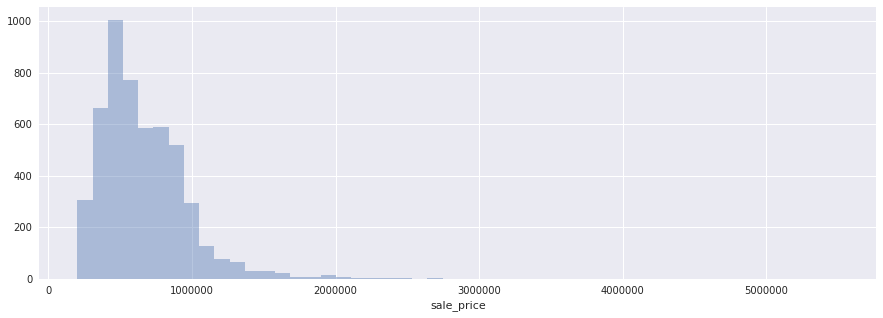

In [19]:
plt.figure(figsize=(15, 5))
sns.distplot((housing["sale_price"]), kde=False);

In [20]:
min_price = np.min(housing["sale_price"])
avg_price = np.mean(housing["sale_price"])
median_price = np.median(housing["sale_price"])
max_price = np.max(housing["sale_price"])
print("Sales data for the year 2017-2018: \n")
print("Minimum price: ${:,.2f}".format(min_price))
print("Mean price: ${:,.2f}".format(avg_price))
print("Median price ${:,.2f}".format(median_price))
print("Maximum price: ${:,.2f}".format(max_price))

Sales data for the year 2017-2018: 

Minimum price: $201,400.00
Mean price: $662,698.07
Median price $595,000.00
Maximum price: $5,500,000.00


In [21]:
housing["neighborhood"] = housing["neighborhood"].astype('category')
housing["zipcode"] = housing["zipcode"].astype('category')
housing["school_district"] = housing["school_district"].astype('category')
housing["community_district"] = housing["community_district"].astype('category')

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 5218
Data columns (total 11 columns):
neighborhood          5151 non-null category
zipcode               5151 non-null category
land_square_feet      5151 non-null float64
gross_square_feet     5151 non-null float64
sale_price            5151 non-null float64
community_district    5151 non-null category
school_district       5151 non-null category
x_coordinate          5151 non-null float64
y_coordinate          5151 non-null float64
earned_income         5151 non-null float64
air_qual              5151 non-null float64
dtypes: category(4), float64(7)
memory usage: 343.2 KB


In [23]:
housing.corr()["sale_price"].sort_values()

earned_income       -0.387663
x_coordinate        -0.206744
air_qual             0.184995
y_coordinate         0.466941
land_square_feet     0.474715
gross_square_feet    0.556126
sale_price           1.000000
Name: sale_price, dtype: float64

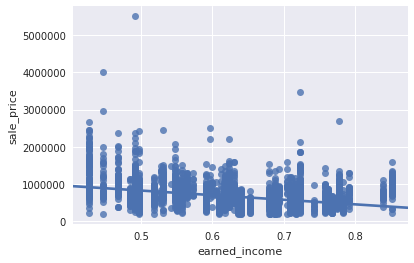

In [24]:
sns.regplot(x="earned_income", y="sale_price", data=housing)

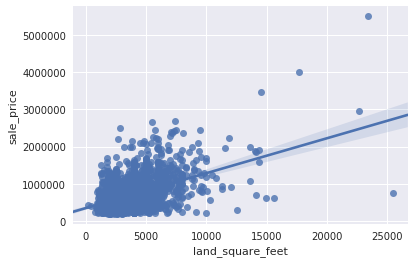

In [25]:
sns.regplot(x="land_square_feet", y="sale_price", data=housing)

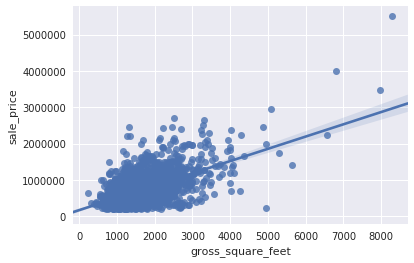

In [26]:
sns.regplot(x="gross_square_feet", y="sale_price", data=housing)

In [27]:
prices = housing["sale_price"]

In [28]:
features = housing.drop(["neighborhood", "zipcode", "sale_price", "community_district", "school_district", "air_qual"], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=.2, random_state=147)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4120, 5)
(1031, 5)
(4120,)
(1031,)


In [30]:
import matplotlib.pyplot as pl
import numpy as np
import sklearn.model_selection as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split

In [31]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=.2, train_size=None, random_state=None)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,5,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

In [32]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=.2, train_size=None, random_state=None)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

In [33]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/home/n

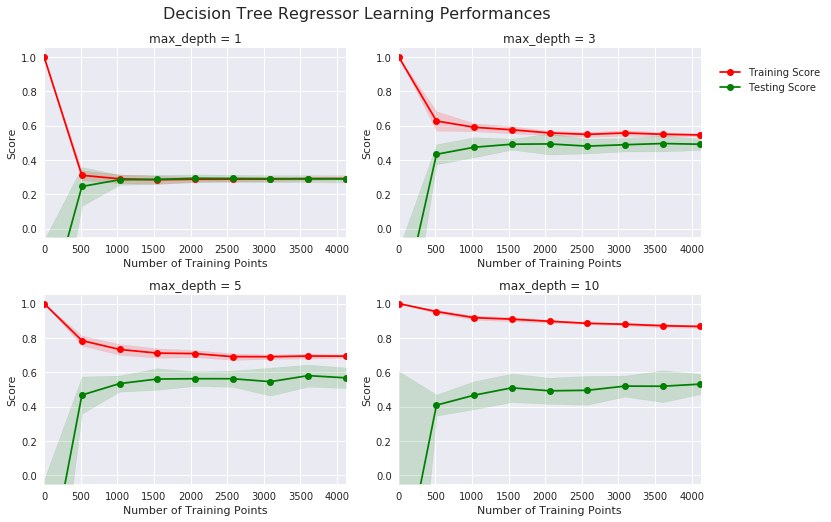

In [34]:
ModelLearning(features, prices)

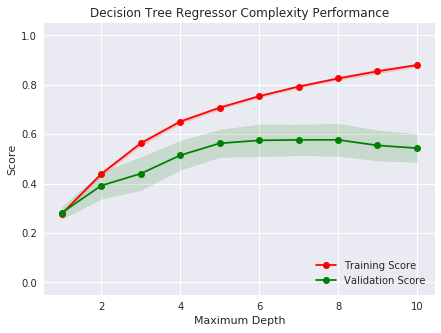

In [35]:
ModelComplexity(X_train, y_train)

In [36]:
from sklearn.metrics import r2_score

In [37]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [39]:
def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits=10, test_size=.1, train_size=None, random_state=None)
    regressor = DecisionTreeRegressor()
    params = {'max_depth': list(range(1, 11))}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)
    return grid.best_estimator_

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

In [41]:
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


In [42]:
#Select supervised learning algorithms to compare
from sklearn.linear_model import LinearRegression

In [43]:
reg1 = LinearRegression(normalize=True)
reg1.fit(X_train, y_train)
reg1.score(X_train, y_train)

0.6106022095077892

In [44]:
y_1 = reg1.predict(X_train)

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [46]:
reg2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9), n_estimators=300, random_state=17)
reg2.fit(X_train, y_train.values.ravel())
reg2.score(X_train, y_train.values.ravel())

0.90326093335974

In [47]:
y_2 = reg2.predict(X_train)

In [48]:
lsf = features["land_square_feet"]
gsf = features["gross_square_feet"]
eic = features["earned_income"]
x_c = features["x_coordinate"]
y_c = features["y_coordinate"]

In [49]:
import math

f1 = np.random.randint(lsf.min(), lsf.max(), 3)
f2 = np.random.randint(gsf.min(), gsf.max(), 3)
f3 = np.random.uniform(eic.min(), eic.max(), 3)
f4 = np.random.randint(x_c.min(), x_c.max(), 3)
f5 = np.random.randint(y_c.min(), y_c.max(), 3)
print(f1)
print(f2)
print(f3)
print(f4)
print(f5)

[8385 8392 2758]
[ 465  975 3173]
[0.80607914 0.50736112 0.82588865]
[1002881  964569 1063623]
[218058 162058 210156]


In [53]:
# Produce a matrix for client data
client_data = [[f1[0], f2[2], f3[1], f4[1], f5[2]], # Client 1
               [f1[2], f2[1], f3[0], f4[0], f5[0]], # Client 2
               [f1[1], f2[0], f3[2], f4[2], f5[1]]]  # Client 3
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $2,500,000.00
Predicted selling price for Client 2's home: $741,277.53
Predicted selling price for Client 3's home: $1,062,286.19


In [51]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $1,609,290.39
Trial 2: $1,492,348.91
Trial 3: $1,640,436.47
Trial 4: $2,500,000.00
Trial 5: $1,799,028.38
Trial 6: $1,703,139.19
Trial 7: $1,175,272.73
Trial 8: $1,795,997.29
Trial 9: $730,000.00
Trial 10: $1,414,436.60

Range in prices: $1,770,000.00
